In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

results = np.load('results/joint.npy', allow_pickle=True).item()

In [3]:
thrs = results['thrs']
head_distance_errs_at_thrs = results['head_distance_errs_at_thrs']
head_count_errs_at_thrs = results['head_count_errs_at_thrs']
heart_distance_errs_at_thrs = results['heart_distance_errs_at_thrs']
heart_count_errs_at_thrs = results['heart_count_errs_at_thrs']
wrist_distance_errs_at_thrs = results['wrist_distance_errs_at_thrs']
wrist_count_errs_at_thrs = results['wrist_count_errs_at_thrs']

Mean PTT error: 13.357537781054184
Median PTT error: 10.0
Mean PTT error: 13.716794320941528
Median PTT error: 10.0


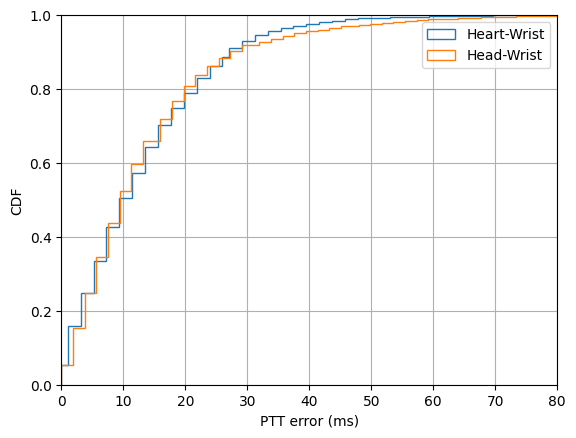

In [4]:
num_queries = len(results['ptt_queries'])
plt.figure()
for i in range(num_queries):
    ptt_gt = np.array(results['ptt_samples'][i]['gt_ptt'])
    ptt_pred = np.array(results['ptt_samples'][i]['pred_ptt'])
    errors = np.abs(ptt_gt - ptt_pred)*2
    print('Mean PTT error:', np.mean(errors))
    print('Median PTT error:', np.median(errors))
    plt.hist(errors, bins=100, density=True, cumulative=True, histtype='step')
plt.xlabel('PTT error (ms)')
plt.ylabel('CDF')

plt.grid()
plt.xlim([0, 80])
plt.ylim([0, 1])
plt.legend(['Heart-Wrist', 'Head-Wrist'])
plt.show()

Threshold: 0.6599999999999997
Distance error 14.802832076342927 12.0


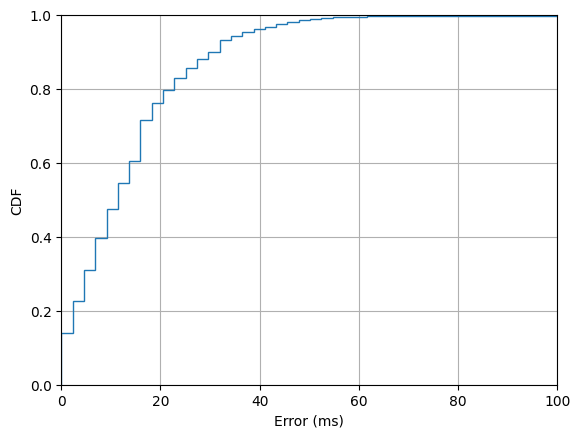

In [17]:
# thr_level = 0.66
idx = np.argmin(np.abs(thrs - 0.66))
err_samples1 = wrist_distance_errs_at_thrs[idx]*2
# idx = np.argmin(np.abs(thrs - 0.78))
# err_samples1 = heart_distance_errs_at_thrs[idx]*2
# idx = np.argmin(np.abs(thrs - 0.68))
# err_samples1 = head_distance_errs_at_thrs[idx]*2
print('Threshold:', thrs[idx])
print('Distance error', np.mean(err_samples1), np.median(err_samples1))
# print(df1.iloc[idx])
# idx = np.argmin(np.abs(df2['mean_count_err'] - err_rate_level))
# err_samples2 = df2['err_samples'][idx]
# print(df2.iloc[idx])
# idx = np.argmin(np.abs(df3['mean_count_err'] - err_rate_level))
# err_samples3 = df3['err_samples'][idx]
# print(df3.iloc[idx])
# plot the cdf
# plt.figure(figsize=(5, 3))
plt.hist(err_samples1, bins=100, density=True, histtype='step', cumulative=True)
# plt.hist(err_samples2, bins=100, density=True, histtype='step', cumulative=True)
# plt.hist(err_samples3*2, bins=100, range=(0, 100), density=True, histtype='step', cumulative=True)
plt.xlabel('Error (ms)')
plt.ylabel('CDF')
plt.grid()
plt.xlim([0, 100])
plt.ylim([0, 1])
# plt.legend(['head', 'heart', 'wrist'])
plt.show()